In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#1. Data Cleaning

##1.1 missing values

Why to understand type of missing data?
>Reasons for missing of data can affect the approach of
handling missing data

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###MCAR

* data missing is completely unrelated to any of the features
* even if missing is related to a randomly occuring cause
* Sol:
  > a) approx missing vals using central measures

  > b) if % of missing vals is less, then drop them

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df['Embarked'].isnull().mean()

0.002244668911335578

###MAR

* val missing is related to the val of other vars in the dataset
  > missing val_var-> steps count
  
  > related val of other var -> 'Boat' val in "Brand_name" feature
* info lost has some connection
* Sol:
  > a) approx missing vals by considering the central measures of only the related vals of the feature
  
  > b) making a model (such as linear or logistic regression) that takes the related features and predicts the desired feature using the available data

Claim: Cabin data is related to Survival

In [ ]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)
df['cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

***obs:*** almost 90% cabin data is missing for passengers who didn't survive

###MNAR

* data is missing at random due to unobserved reasons meaning the feature causing it isn't observed and exists outside the dataset
* sol:
  >difficult to resolve, so try to avoid this type of data during data collection

Techniques to handle missing values?
  > a) mean/median/mode

  > b) random sample imputation

  > c) capturing NAN vals with a new feature

  > d) end of distribution imputation

  > e) arbitrary imputation

  > f) frequent categories imputation  

  After imputation, check for variance or std dev to make sure that the variance info is not lost

###a) Mean/Median Imputation:
* advantages:
  > robust to outliers
  
  > faster way to obtain complete dataset

* disadvantages
  >change in variance of original data

  >impacts correlation




In [ ]:
from sklearn.impute import SimpleImputer
imp_simple = SimpleImputer(strategy='median')
df['Age_imp'] = imp_simple.fit_transform(df[['Age']])

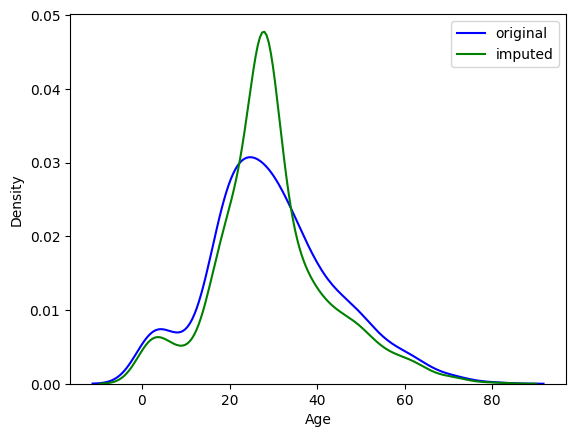

In [ ]:
sns.kdeplot(df['Age'], color='blue', label='original')
sns.kdeplot(df['Age_imp'], color='green', label='imputed')

plt.legend()

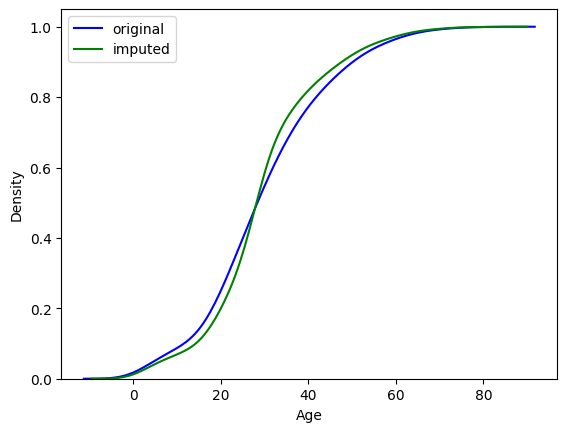

In [ ]:
sns.kdeplot(df['Age'], color='blue', label='original', cumulative=True)
sns.kdeplot(df['Age_imp'], color='green', label='imputed', cumulative=True)

plt.legend()

In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_null,Age_imp
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.019919,0.034212
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.316912,-0.064910
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.725541,-0.339898
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.249732,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.040460,-0.233296
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.036987,-0.172482
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.482075,0.096688
cabin_null,-0.019919,-0.316912,0.725541,-0.249732,0.040460,-0.036987,-0.482075,1.000000,-0.240314
Age_imp,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.240314,1.000000


###b) Random Sample Imputation
* randomly selecting observations and using the corresponding feature's val to replace NaN vals
* advantages:
  > less distortion in variance
* disadvantages:
  > randomness won't work incase of MAR

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_null       0
Age_imp          0
dtype: int64

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_random(df, var):
  df[var+"_random"] = df[var]
  random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
  random_sample.index = df[df[var].isnull()].index
  #replace index of random samples with index of missing vals
  df.loc[df[var].isnull(), var+'_random'] = random_sample

In [ ]:
impute_random(df, 'Age')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_imp,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0


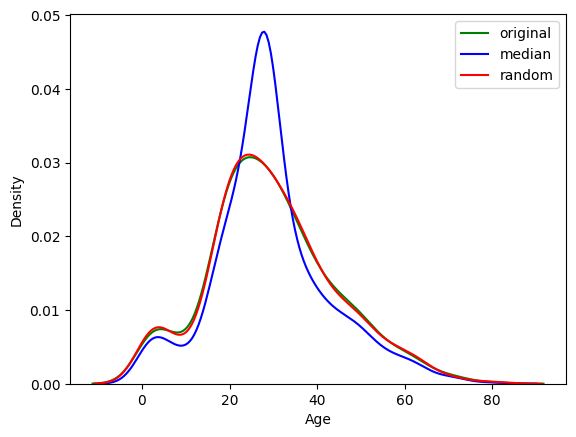

In [ ]:
sns.kdeplot(df['Age'], color='green', label='original')
sns.kdeplot(df['Age_imp'], color='blue', label='median')
sns.kdeplot(df['Age_random'], color='red', label='random')

plt.legend()

***obs:*** random imputation matches the variance of our original dataset

###c) capturing NaN vals with a new feature
* advantages
  > works well when missing type: **MNAR**

  > indicates importance of missing vals

* disadvantages
  > if too many features with missing vals -> creation of too many new features -> issue of **curse of dimensionality**
  

In [ ]:
df['Age_NaN'] = np.where(df['Age'].isnull(), 1, 0)
df[['Age', 'Age_NaN']].head(10)

,Age,Age_NaN
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
5,NaN,1
6,54.0,0
7,2.0,0
8,27.0,0
9,14.0,0
